<a href="https://colab.research.google.com/github/ibixina/ML/blob/main/training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./training_data.csv")
print(data.shape)
data.head(20)

(252, 7)


,morale,gain,statType,initial_morale,initial_stat,experience,energy
0,5,4.71,NaN,334,13669.57,3,5
1,132,146.05,NaN,399,13674.33,80,150
2,21,23.11,NaN,163,13821.84,14,25
3,138,143.98,NaN,323,13845.18,82,150
4,134,169.97,NaN,2457,4444.44,67,150
5,132,143.38,agility,299,13990.60,63,150
6,10,9.24,agility,187,14135.41,5,10
7,134,134.53,strength,1687,4616.11,64,150
8,333,31.47,agility,400,14144.75,16,35
9,135,150.36,agility,400,14176.53,63,150


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/12U5U0k2PXSE37LDnyW2iYGfD0B5Ba2FZtRPfWpTpRbA/edit#gid=0


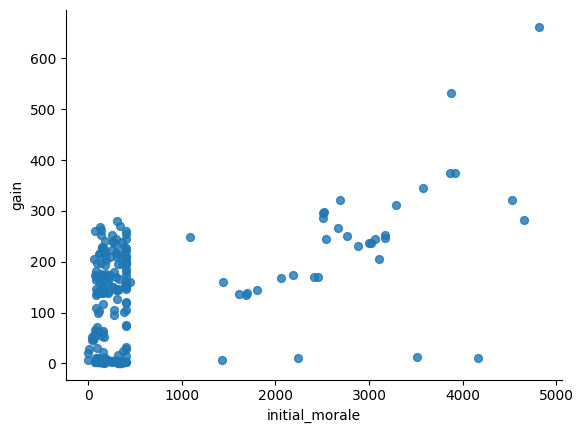

In [4]:
# @title morale vs energy

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='initial_morale', y='gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:

y = data["gain"]




predictors = ["energy", "initial_morale", "initial_stat", "statTypeNum"]

# convert statType to numbers and make a new column
data["statTypeNum"] = data["statType"].map({"strength": 0, "agility": 1, "speed": 2})

# Nan becomes agility
data["statTypeNum"] = data["statTypeNum"].fillna(1)

data.head()

# X = data[predictors]
# X.head()

<ipython-input-8-518892180cc9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["statTypeNum"] = data["statType"].map({"strength": 0, "agility": 1, "speed": 2})
<ipython-input-8-518892180cc9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["statTypeNum"] = data["statTypeNum"].fillna(1)


,morale,gain,statType,initial_morale,initial_stat,experience,energy,statTypeNum
5,132,143.38,agility,299,13990.60,63,150,1
6,10,9.24,agility,187,14135.41,5,10,1
8,333,31.47,agility,400,14144.75,16,35,1
9,135,150.36,agility,400,14176.53,63,150,1
10,118,127.42,agility,306,14328.40,67,130,1


In [9]:
# filter out and keep only one statType
data = data[data["statType"] == "agility"]
y = data["gain"]
X = data[predictors]
print(X.shape, y.shape)
X.head()

(176, 4) (176,)


,energy,initial_morale,initial_stat,statTypeNum
5,150,299,13990.60,1
6,10,187,14135.41,1
8,35,400,14144.75,1
9,150,400,14176.53,1
10,130,306,14328.40,1


In [7]:
X = data[predictors]
print(X.shape, y.shape)
X.head()

(176, 4) (176,)


,energy,initial_morale,initial_stat,statTypeNum
5,150,299,13990.60,1.0
6,10,187,14135.41,1.0
8,35,400,14144.75,1.0
9,150,400,14176.53,1.0
10,130,306,14328.40,1.0


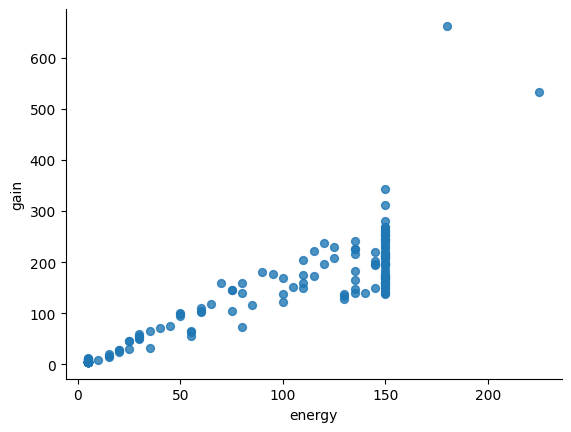

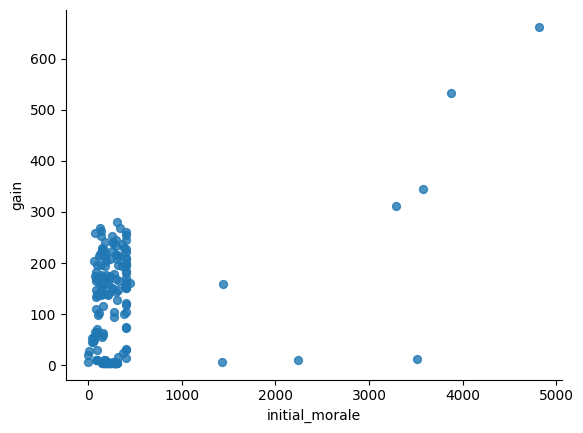

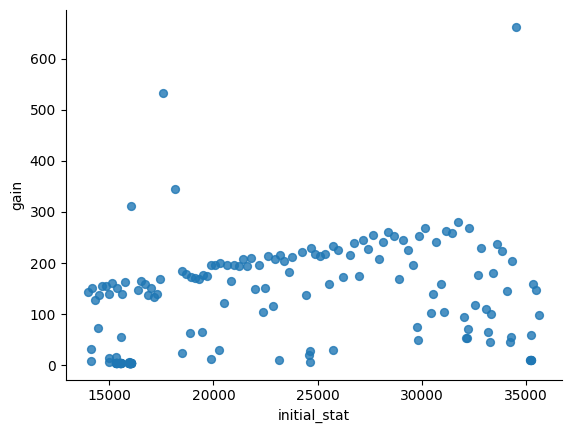

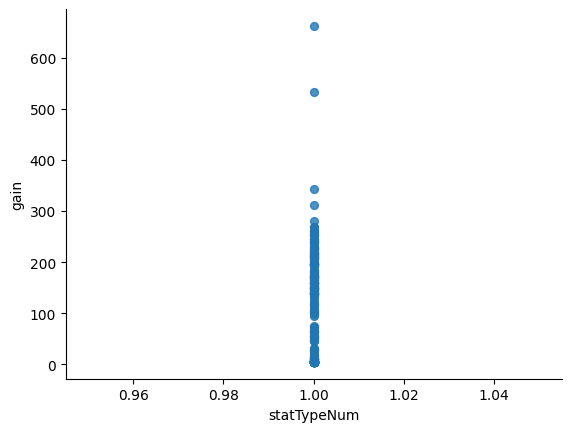

In [19]:
#generate plots for each predictoes
for predictor in predictors:
    data.plot(kind='scatter', x=predictor, y='gain', s=32, alpha=.8)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

In [ ]:
intermediateY = data["morale"]
print(intermediateY.shape)
intermediatePredictors = ["energy", "initial_morale", "initial_stat", "statTypeNum"]
intermediateX = data[intermediatePredictors]

(184,)


In [ ]:
itrain_x, itest_x, itrain_y, itest_y = train_test_split(intermediateX, intermediateY, test_size=0.1, random_state=42)
print(itrain_x.shape, itrain_y.shape, itest_x.shape, itest_y.shape)

itrain_y.head()

(165, 4) (165,) (19, 4) (19,)


,morale
56,5
164,124
124,85
146,131
30,4


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    SVR,
]  # Replace with regression models

for model in models:
    print(model.__name__)  # Get the model name
    clf = model()
    clf.fit(itrain_x, itrain_y)
    print(clf.score(itest_x, itest_y))
    print(f"itest_x: {itest_x.iloc[0]}")
    print(f"itest_y: {itest_y.iloc[0]}")
    print(f"predicted: {clf.predict([itest_x.iloc[0]])}")
    print("\n")

LinearRegression


NameError: name 'itrain_x' is not defined

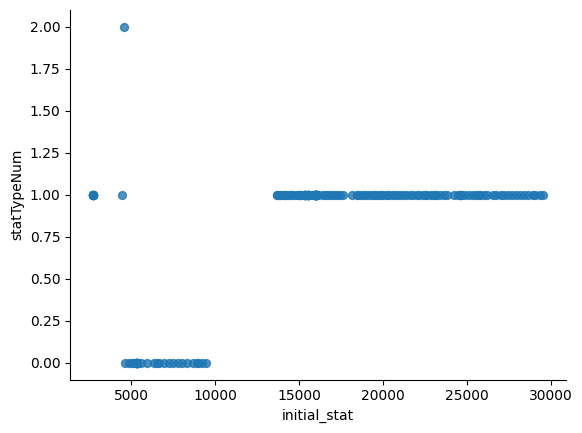

In [ ]:
# @title initial_stat vs statTypeNum

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='initial_stat', y='statTypeNum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(88, 4) (88, 4) (88,) (88,)


In [ ]:
# lets try linar regression
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

import numpy as np

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

print(model.coef_)
print(model.intercept_)

[1.22759034 0.03764554 0.00460462 0.        ]
-92.6757318259519


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    SVR,
]  # Replace with regression models

models_trained = {}

best_score = -1
best_model = None

for model in models:
    print(model.__name__)  # Get the model name
    clf = model()
    clf.fit(x_train, y_train)

    models_trained[model.__name__] = clf
    score = clf.score(x_test, y_test)
    if score > best_score:
        best_score = score
        best_model = clf
    print(clf.score(x_test, y_test))
    print(f"x_test: {x_test.iloc[0]}")
    print(f"y_test: {y_test.iloc[0]}")
    print(f"predicted: {clf.predict([x_test.iloc[0]])}")
    print("\n")

# save the best model
import pickle
pickle.dump(best_model, open(best_model.__class__.__name__+".pkl", "wb"))

def check_model(m):
  # print name
  print(m.__class__.__name__)
  predictions = m.predict(x_test)

  for ny, ny_pred in zip(y_test, predictions):
      print(f"y: {ny}, y_pred: {ny_pred} diff: {ny - ny_pred}")

to_check = best_model
check_model(to_check)

LinearRegression
0.9007024836557813
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [-11.0291]


DecisionTreeRegressor
0.9723743559619086
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [5.34]


RandomForestRegressor
0.9863194736044982
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [5.2463]


GradientBoostingRegressor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9902637170394734
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [5.59518142]


SVR
-0.3387511620699495
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [154.42311478]


GradientBoostingRegressor
y: 5.4, y_pred: 5.595181417541919 diff: -0.1951814175419182
y: 5.12, y_pred: 5.186202947649651 diff: -0.06620294764965085
y: 102.49, y_pred: 95.69618475047949 diff: 6.793815249520506
y: 5.39, y_pred: 5.595181417541919 diff: -0.20518141754191888
y: 134.46, y_pred: 146.13412377521257 diff: -11.674123775212564
y: 5.25, y_pred: 5.595181417541919 diff: -0.34518141754191856
y: 225.25, y_pred: 219.25871197653458 diff: 5.991288023465415
y: 60.26, y_pred: 60.82294260653107 diff: -0.5629426065310739
y: 20.48, y_pred: 13.929424981485704 diff: 6.550575018514296
y: 139.21, y_pred: 133.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [22]:
# decision tree model

decision_tree_model = models_trained["DecisionTreeRegressor"]
decision_tree_model.fit(x_train, y_train)
decision_tree_model.score(x_test, y_test)

0.9629792117696171

In [23]:
test_data1 = {
    "energy": 5,
    "initial_morale": 15,
    "initial_stat": 35016.13,
    "statTypeNum": 1
}
predicted_value1 = decision_tree_model.predict([list(test_data1.values())])
print(f"Predicted value for test_data1: {predicted_value1}")

Predicted value for test_data1: [7.07]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [24]:
test_data2 = {
    "energy": 5,
    "initial_morale": 11,
    "initial_stat": 35716.45,
    "statTypeNum": 1
}
predicted_value2 = decision_tree_model.predict([list(test_data2.values())])
print(f"Predicted value for test_data2: {predicted_value2}")

Predicted value for test_data2: [7.07]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree_model, feature_names=predictors)
print(tree_rules)

|--- energy <= 67.50
|   |--- energy <= 22.50
|   |   |--- energy <= 12.50
|   |   |   |--- initial_stat <= 19608.84
|   |   |   |   |--- initial_stat <= 14728.91
|   |   |   |   |   |--- value: [9.24]
|   |   |   |   |--- initial_stat >  14728.91
|   |   |   |   |   |--- initial_morale <= 197.50
|   |   |   |   |   |   |--- initial_morale <= 180.00
|   |   |   |   |   |   |   |--- initial_stat <= 16044.72
|   |   |   |   |   |   |   |   |--- initial_stat <= 16034.20
|   |   |   |   |   |   |   |   |   |--- initial_morale <= 176.00
|   |   |   |   |   |   |   |   |   |   |--- value: [5.15]
|   |   |   |   |   |   |   |   |   |--- initial_morale >  176.00
|   |   |   |   |   |   |   |   |   |   |--- value: [5.21]
|   |   |   |   |   |   |   |   |--- initial_stat >  16034.20
|   |   |   |   |   |   |   |   |   |--- value: [5.35]
|   |   |   |   |   |   |   |--- initial_stat >  16044.72
|   |   |   |   |   |   |   |   |--- initial_stat <= 16050.01
|   |   |   |   |   |   |   |   |   |--- 